Installing Packages

In [1]:
pip install MinHash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install datasketch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 75 kB 2.6 MB/s 


In [3]:
pip install mmh3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.8 MB/s 


Importing packages

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import jaccard_score
from datasketch import MinHash
from scipy.spatial import distance
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Give input with column heading as follows

'x' for latitute

'y' for longitude

't' for timestamp


In [5]:
dataframe=pd.read_csv('/content/test-data.csv')

In [6]:
dataframe2=dataframe
df=dataframe2.drop(columns=['id'],axis=1)
df

,t,x,y
0,0,201.623002,186.148565
1,0,247.658670,177.650135
2,0,127.457230,20.572136
3,0,231.180722,172.861323
4,0,217.739518,189.203565
...,...,...,...
20395,50,295.178529,126.033557
20396,50,12.043092,48.362010
20397,50,147.567782,191.984055
20398,50,298.794838,87.621002


In [7]:
divisions1=float(input())
divisions2=float(input())
divisions3=float(input())

4
4
4


In [8]:
L=[]
a=(df['x'].max()-df['x'].min())//divisions1
b=(df['y'].max()-df['y'].min())//divisions2
c=(df['t'].max()-df['t'].min())//divisions3

In [9]:
for i in range(int(df['x'].min()),int(df['x'].max()), int(a)):
  for j in range(int(df['y'].min()),int(df['y'].max()), int(b)):
    for k in range(int(df['t'].min()),int(df['t'].max()),int(c)):
      L.append([[i,i+a],[j,j+b],[k,k+c]])
#L

In [11]:
def stcube(point,l):
  d=[]
  for i in range(len(L)):
    d.append((point[0]-(L[i][0][0]+L[i][0][1])/2)**2+(point[1]-(L[i][1][0]+L[i][1][1])/2)**2+(point[2]-(L[i][2][0]+L[i][2][1])/2)**2)
  index_min = min(range(len(d)), key=d.__getitem__)
  return index_min
  

Finding ST Cubes points belong to

In [12]:
belong=[]
for q1 in range(len(df)):
  belong.append(stcube(df.iloc[q1],L))
#belong
df['belong']=belong
df

,t,x,y,belong
0,0,201.623002,186.148565,19
1,0,247.658670,177.650135,24
2,0,127.457230,20.572136,11
3,0,231.180722,172.861323,24
4,0,217.739518,189.203565,19
...,...,...,...,...
20395,50,295.178529,126.033557,24
20396,50,12.043092,48.362010,4
20397,50,147.567782,191.984055,14
20398,50,298.794838,87.621002,24


In [13]:
ids=dataframe['id']

In [14]:
df['id']=ids

In [15]:
df['cubelist'] = dataframe2['id'].map(df.groupby('id')['belong'].agg(list))

In [16]:
df['sets'] = df['id'].map(df.groupby('id')['belong'].agg(set))
df

,t,x,y,belong,id,cubelist,sets
0,0,201.623002,186.148565,19,0,"[19, 19, 19, 19, 19, 19, 19, 24, 24, 24, 24, 2...","{24, 19}"
1,0,247.658670,177.650135,24,1,"[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...",{24}
2,0,127.457230,20.572136,11,2,"[11, 11, 11, 11, 12, 12, 12, 12, 12, 7, 7, 7, ...","{3, 4, 7, 8, 11, 12}"
3,0,231.180722,172.861323,24,3,"[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...",{24}
4,0,217.739518,189.203565,19,4,"[19, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...","{24, 19}"
...,...,...,...,...,...,...,...
20395,50,295.178529,126.033557,24,395,"[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...",{24}
20396,50,12.043092,48.362010,4,396,"[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","{3, 4, 7, 8, 11, 12}"
20397,50,147.567782,191.984055,14,397,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, ...","{9, 4, 14}"
20398,50,298.794838,87.621002,24,398,"[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...",{24}


In [17]:
df2=df
df2

,t,x,y,belong,id,cubelist,sets
0,0,201.623002,186.148565,19,0,"[19, 19, 19, 19, 19, 19, 19, 24, 24, 24, 24, 2...","{24, 19}"
1,0,247.658670,177.650135,24,1,"[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...",{24}
2,0,127.457230,20.572136,11,2,"[11, 11, 11, 11, 12, 12, 12, 12, 12, 7, 7, 7, ...","{3, 4, 7, 8, 11, 12}"
3,0,231.180722,172.861323,24,3,"[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...",{24}
4,0,217.739518,189.203565,19,4,"[19, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...","{24, 19}"
...,...,...,...,...,...,...,...
20395,50,295.178529,126.033557,24,395,"[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...",{24}
20396,50,12.043092,48.362010,4,396,"[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","{3, 4, 7, 8, 11, 12}"
20397,50,147.567782,191.984055,14,397,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, ...","{9, 4, 14}"
20398,50,298.794838,87.621002,24,398,"[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...",{24}


Minhashing

In [18]:
from datasketch import MinHash
def minhash(inp1,inp2):
  m1, m2 = MinHash(), MinHash()

  for d in str(inp1):
    m1.update(d.encode('utf8'))

  for d in str(inp2):
    m2.update(d.encode('utf8'))
  return m1.jaccard(m2)

In [22]:
minhash(df2['sets'][0],df2['sets'][3])

0.4375

In [ ]:
similarity=[]
pdist = np.zeros((len(df2),len(df2)))

for i1 in range(len(df2)):
  for j1 in range(len(df2)):
    similarity.append(minhash(df2['sets'][i1],df2['sets'][j1]))
    pdist[i1][j1]=minhash(df2['sets'][i1],df2['sets'][j1])

In [ ]:
pdist=pd.DataFrame(pdice)
pdist

Jaccard Similarity

In [157]:
def jac(s1,s2):
  jaccard_sim = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
  return jaccard_sim

In [158]:
jac(df2['sets'][0],df2['sets'][4])

1.0

In [ ]:
similarity=[]
pdice = np.zeros((len(df2),len(df2)))

for i1 in range(len(df2)):
  for j1 in range(len(df2)):
    similarity.append(jac(df2['sets'][i1],df2['sets'][j1]))
    pdice[i1][j1]=jac(df2['sets'][i1],df2['sets'][j1])

In [ ]:
pdice=pd.DataFrame(pdice)
pdice

In [ ]:
pdice.to_csv('distmatstc.csv')

In [ ]:
pdice.to_csv('distmatstc.csv')

Hierarchical Clustering

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


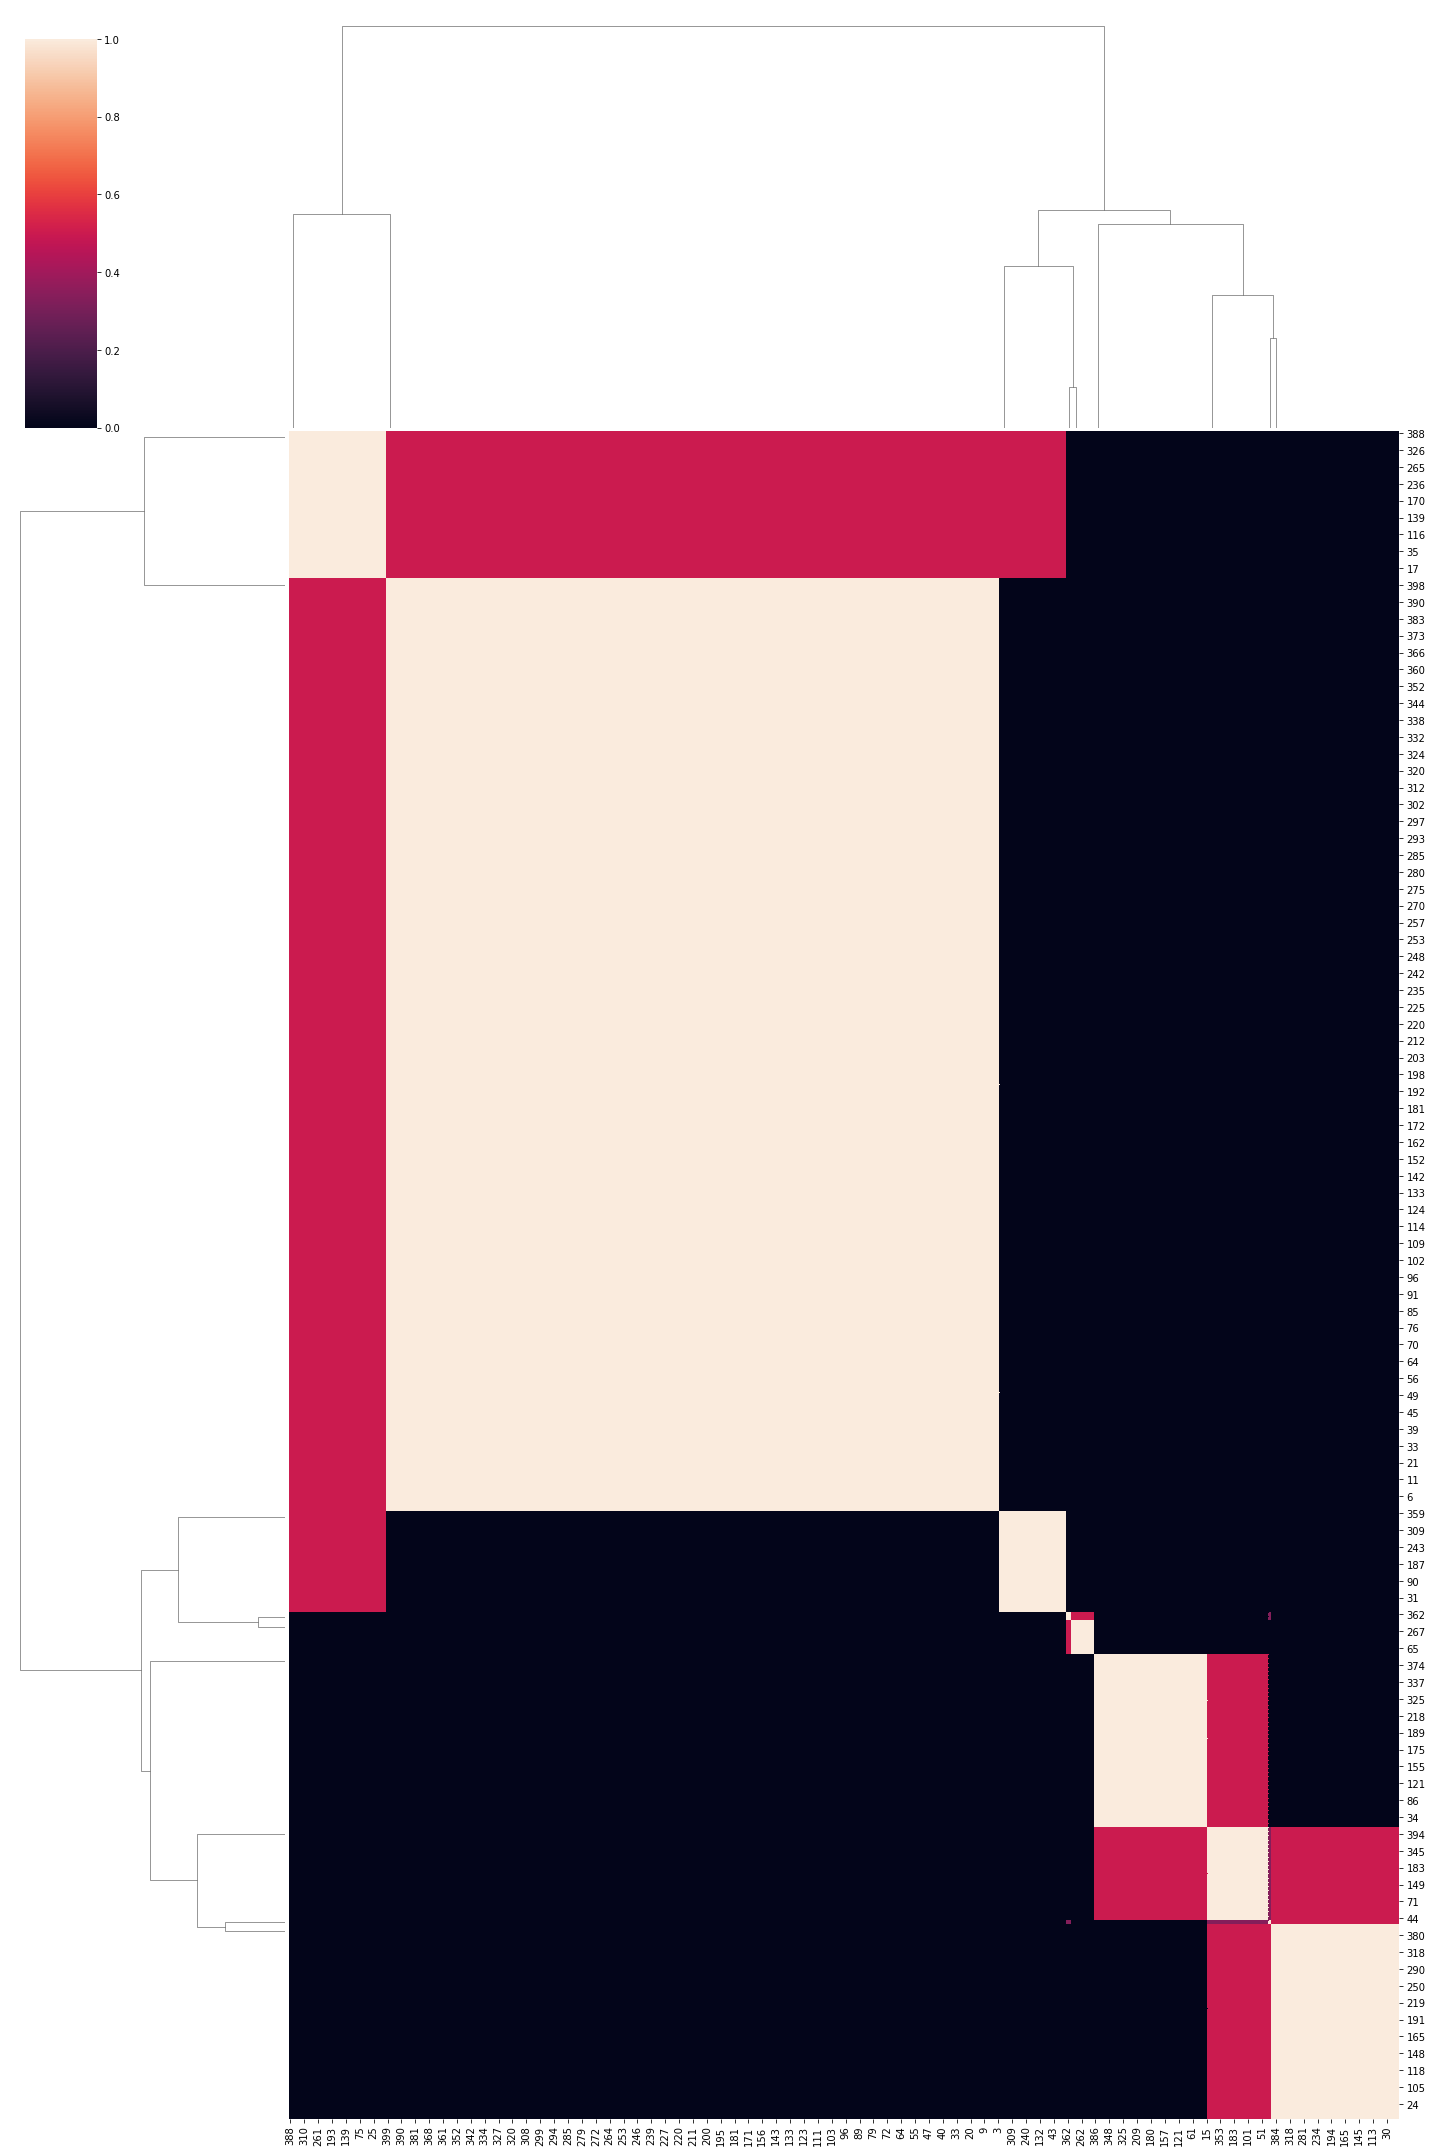

In [50]:
fig1=sns.clustermap(pdice,figsize=(20, 30))

,t,x,y,belong,id,cubelist,sets
0,0,201.623002,186.148565,9,0,"[9, 9, 9, 9, 9]",{9}
1,0,247.658670,177.650135,11,1,"[11, 11, 11, 11, 11]",{11}
2,0,127.457230,20.572136,5,2,"[5, 5, 5, 5, 5]",{5}
3,0,231.180722,172.861323,11,3,"[11, 11, 11, 11, 11]",{11}
4,0,217.739518,189.203565,9,4,"[9, 11, 11, 11, 11]","{9, 11}"
...,...,...,...,...,...,...,...
395,0,231.086745,188.797910,11,395,"[11, 11, 11, 11, 11]",{11}
396,0,142.821762,19.100723,7,396,"[7, 7, 7, 5, 5]","{5, 7}"
397,0,30.066118,214.589993,1,397,"[1, 1, 1, 1, 1]",{1}
398,0,236.561536,173.604041,11,398,"[11, 11, 11, 11, 11]",{11}


In [107]:
list(df2['sets'][5])

[11]

In [114]:
lists=[]

for i3 in range(len(df2)):

  t=list(df2['sets'][i3])
  lists.append(t)

In [115]:
df2['lists']= lists

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
matrix = np.zeros((len(df2),len(df2)))

for z1 in range(len(df2)):
  for z2 in range(len(df2['sets'][z1])):
    for z3 in range(0,399):
      if df2['lists'][z1][z2]==z3:
        matrix[z1][z2]=1
        matrix[z2][z1]=1
mat=pd.DataFrame(matrix)

In [120]:
mat

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dice

In [72]:
df2['sets'][1].intersection(df2['sets'][9])

{11}

In [ ]:
def single_dice_coef(y1, y2):
    # shape of y_true and y_pred_bin: (height, width)
    
    return 2*y1.intersection(y2)/(s1.union(s2))

In [64]:
def single_dice_coef(y_true, y_pred_bin):
    # shape of y_true and y_pred_bin: (height, width)
    intersection = np.sum(y_true * y_pred_bin)
    if (np.sum(y_true)==0) and (np.sum(y_pred_bin)==0):
        return 1
    return (2*intersection) / (np.sum(y_true) + np.sum(y_pred_bin))

In [67]:
similaritydice=[]
pdice2 = np.zeros((len(df2),len(df2)))

for i1 in range(len(df2)):
  for j1 in range(len(df2)):
    similaritydice.append(single_dice_coef(df2['sets'][i1],df2['sets'][j1]))
    pdice2[i][j]=single_dice_coef(dfsub['sets'][i1],dfsub['sets'][j1])

NameError: ignored

dice

          0         1         2         3         4         5         6    \
0    0.000000  0.735358  0.995012  0.995012  0.990050  0.995012  0.995012   
1    0.735358  0.000000  0.967742  0.967742  0.968254  0.967742  0.967742   
2    0.995012  0.967742  0.000000  0.000000  0.333333  0.000000  0.000000   
3    0.995012  0.967742  0.000000  0.000000  0.333333  0.000000  0.000000   
4    0.990050  0.968254  0.333333  0.333333  0.000000  0.333333  0.333333   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.995012  0.967742  0.000000  0.000000  0.333333  0.000000  0.000000   
396  0.990050  0.968254  0.333333  0.333333  0.000000  0.333333  0.333333   
397  0.995012  0.967742  0.000000  0.000000  0.333333  0.000000  0.000000   
398  0.995012  0.967742  0.000000  0.000000  0.333333  0.000000  0.000000   
399  0.995012  0.967742  0.000000  0.000000  0.333333  0.000000  0.000000   

          7         8         9    ...       390       391       392  \
0  

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


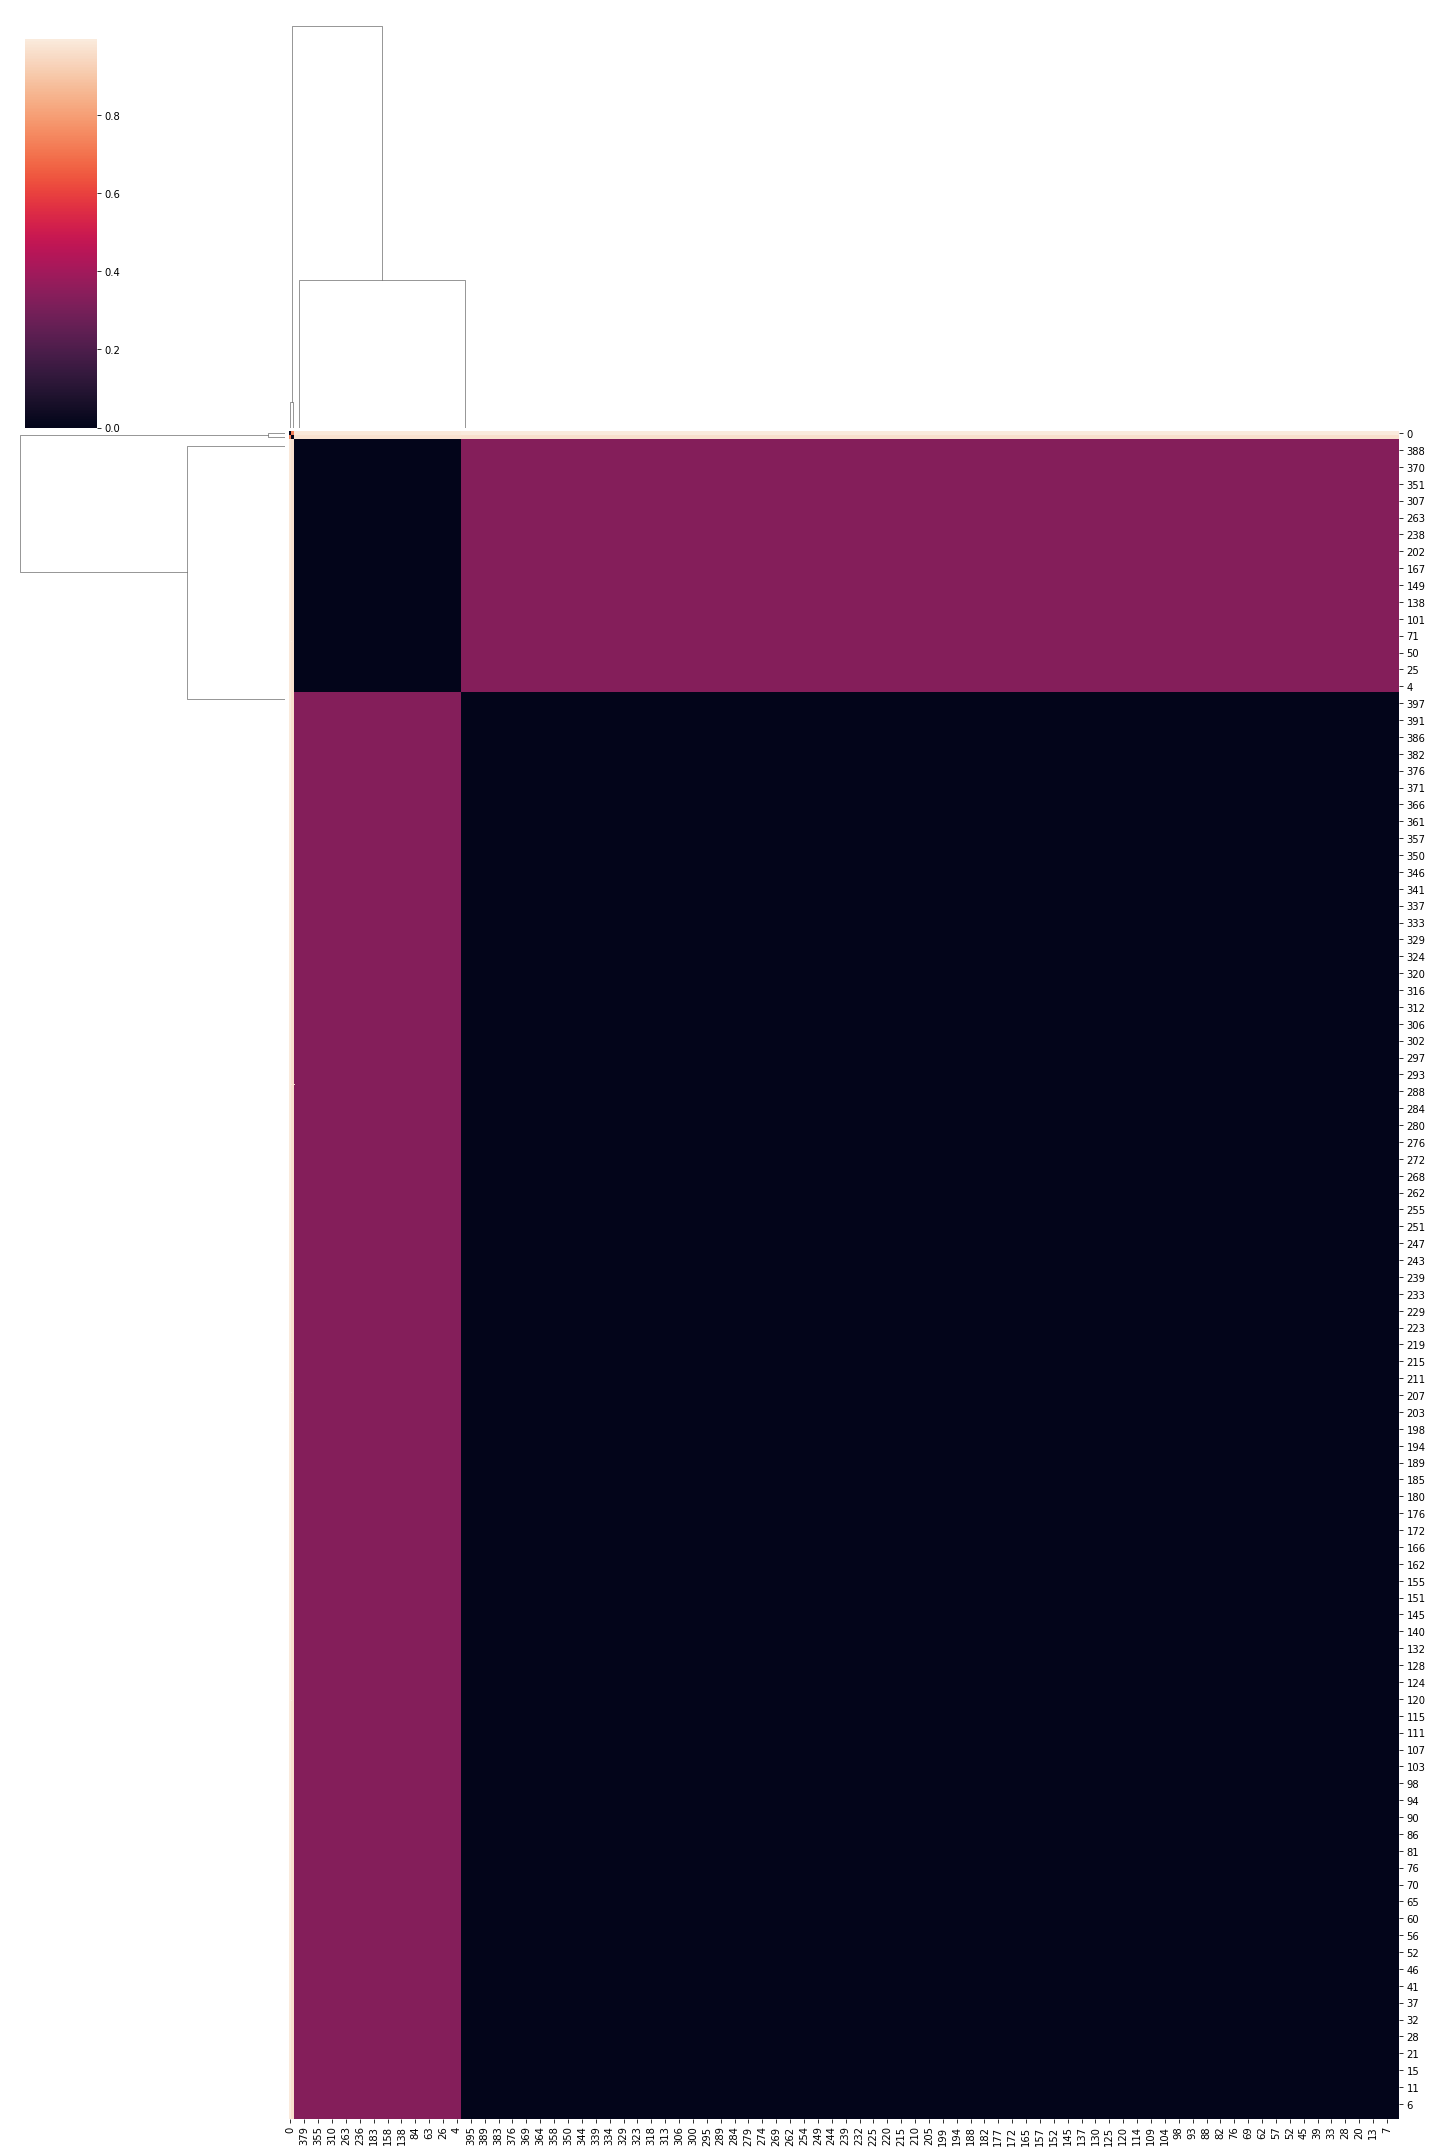

In [128]:
#dice
pdice = np.zeros((len(mat),len(mat)))
for i in range(len(mat)):
  for j in range(len(mat)):
    pdice[i][j]=distance.dice(mat.loc[[j]],mat.loc[[i]])          
  distmatdice=pd.DataFrame(pdice)
print(distmatdice)
fig11=sns.clustermap(distmatdice,figsize=(20, 30))

sokalsneath

          0         1         2         3         4         5         6    \
0    0.000000  0.917456  0.998748  0.998748  0.997494  0.998748  0.998748   
1    0.917456  0.000000  0.991736  0.991736  0.991870  0.991736  0.991736   
2    0.998748  0.991736  0.000000  0.000000  0.666667  0.000000  0.000000   
3    0.998748  0.991736  0.000000  0.000000  0.666667  0.000000  0.000000   
4    0.997494  0.991870  0.666667  0.666667  0.000000  0.666667  0.666667   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.998748  0.991736  0.000000  0.000000  0.666667  0.000000  0.000000   
396  0.997494  0.991870  0.666667  0.666667  0.000000  0.666667  0.666667   
397  0.998748  0.991736  0.000000  0.000000  0.666667  0.000000  0.000000   
398  0.998748  0.991736  0.000000  0.000000  0.666667  0.000000  0.000000   
399  0.998748  0.991736  0.000000  0.000000  0.666667  0.000000  0.000000   

          7         8         9    ...       390       391       392  \
0  

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


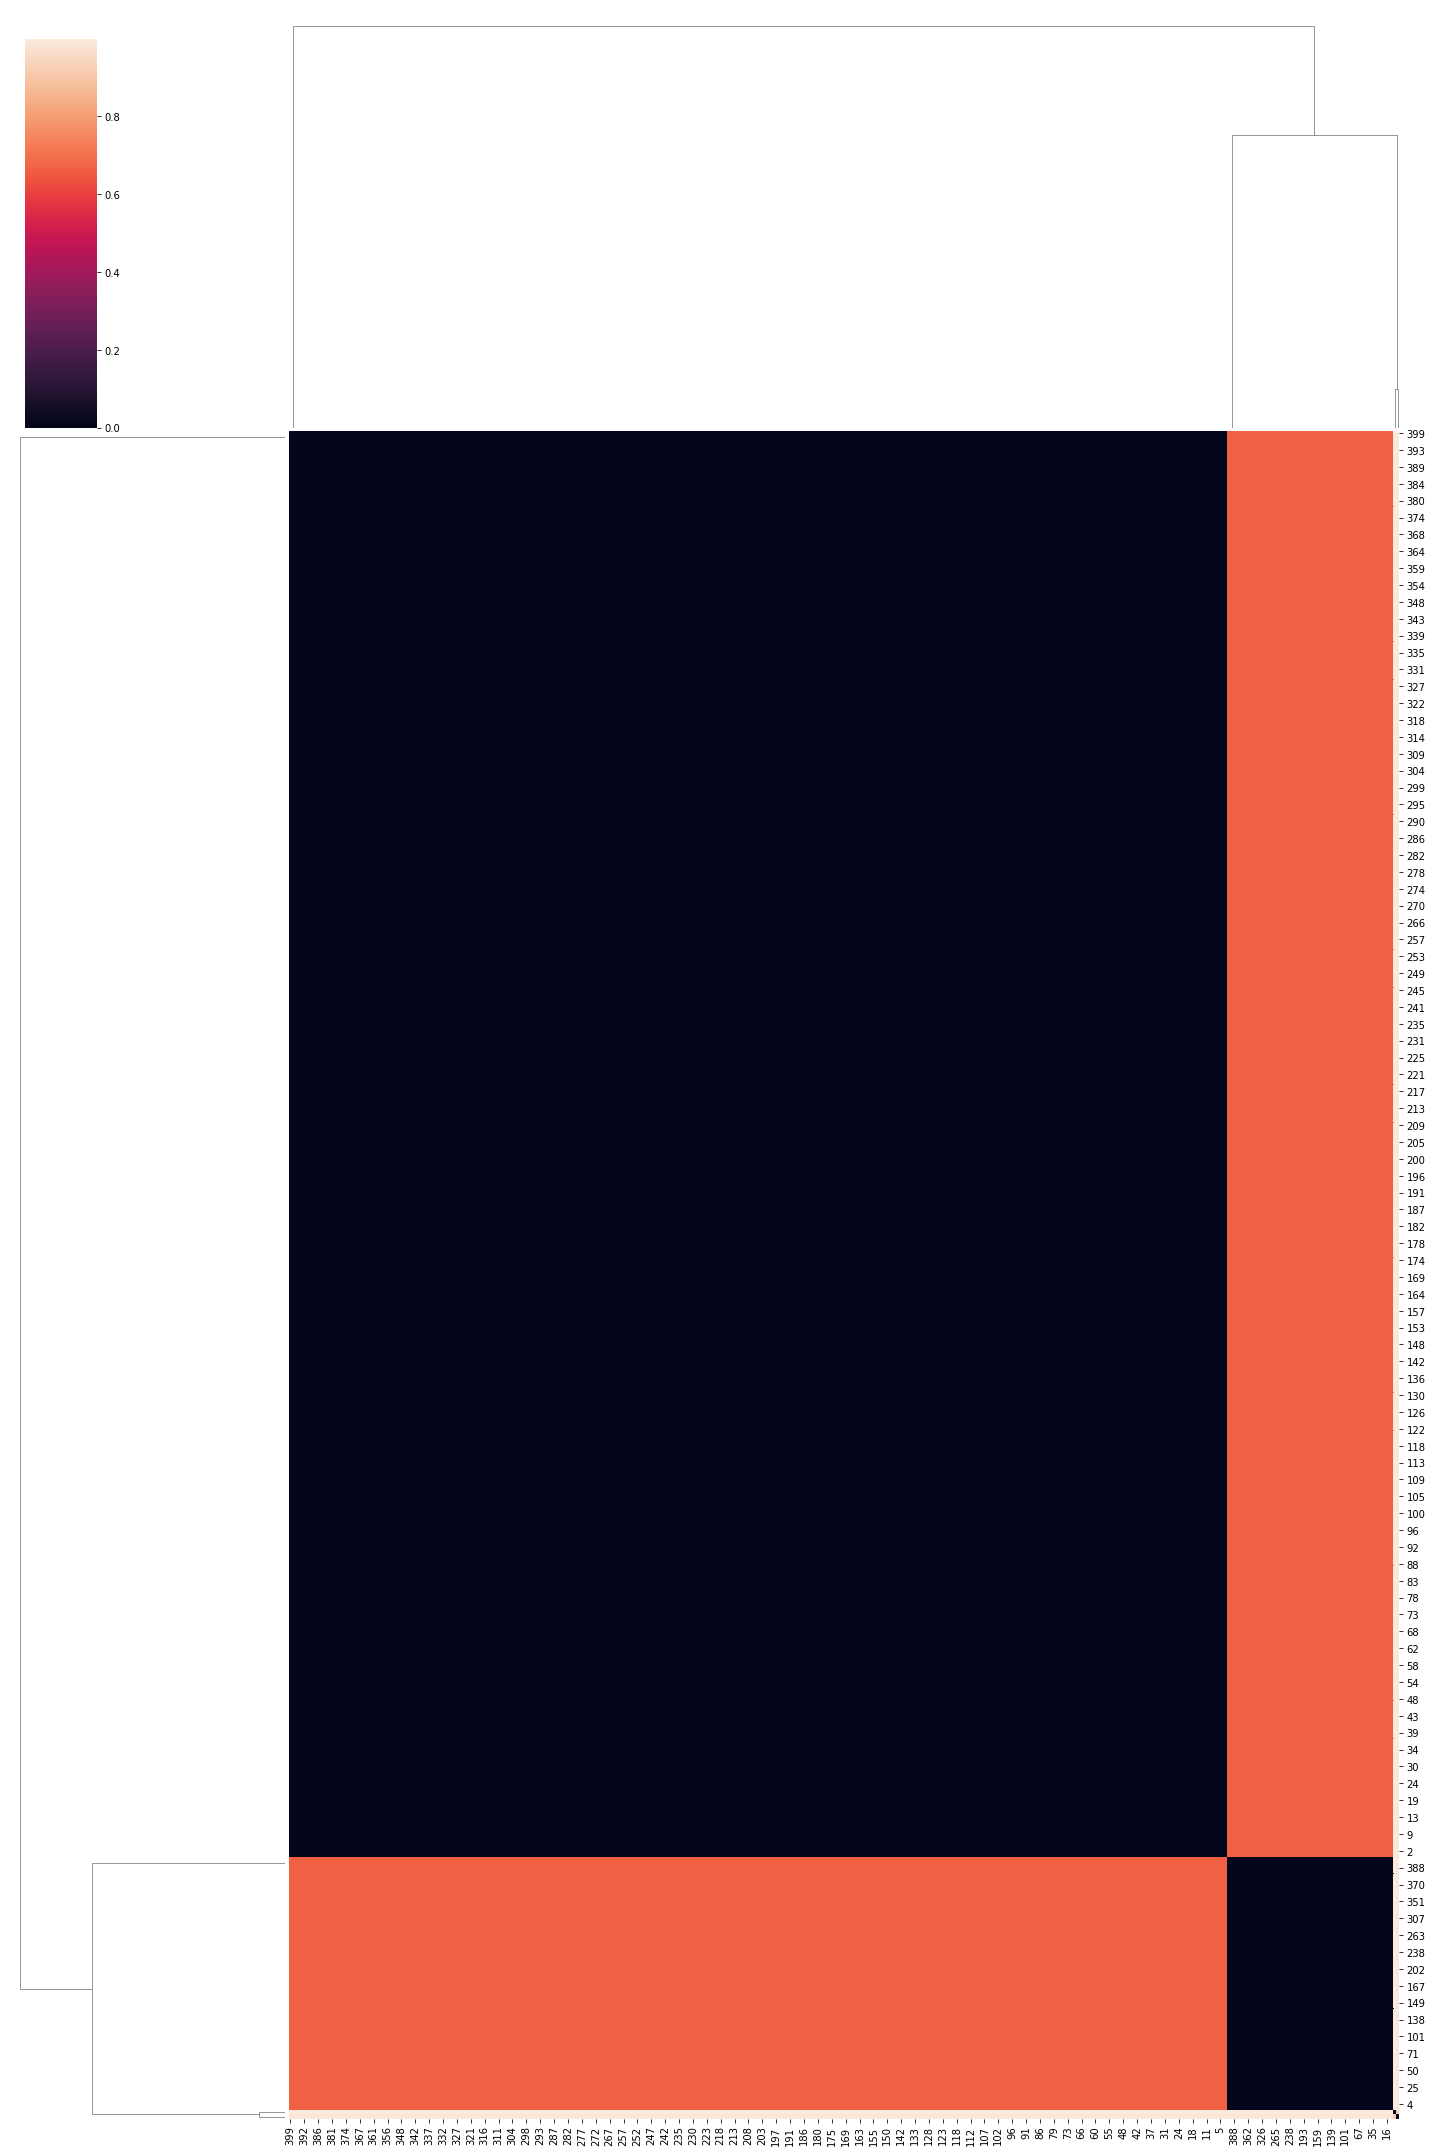

In [121]:
#sokalsneath
psokalsneath = np.zeros((len(mat),len(mat)))
for i in range(len(mat)):
  for j in range(len(mat)):
    psokalsneath[i][j]=distance.sokalsneath(mat.loc[[j]],mat.loc[[i]])          
  distsokalsneath=pd.DataFrame(psokalsneath)
print(distsokalsneath)
figsokalsneath=sns.clustermap(distsokalsneath,figsize=(20, 30))

Russellrao

        0       1       2       3       4       5       6       7       8    \
0    0.0000  0.8475  0.9975  0.9975  0.9950  0.9975  0.9975  0.9975  0.9950   
1    0.8475  0.8475  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975   
2    0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975   
3    0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975   
4    0.9950  0.9975  0.9975  0.9975  0.9950  0.9975  0.9975  0.9975  0.9950   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
395  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975   
396  0.9950  0.9975  0.9975  0.9975  0.9950  0.9975  0.9975  0.9975  0.9950   
397  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975   
398  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975   
399  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975  0.9975   

        9    ...     390     391     392     393   

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


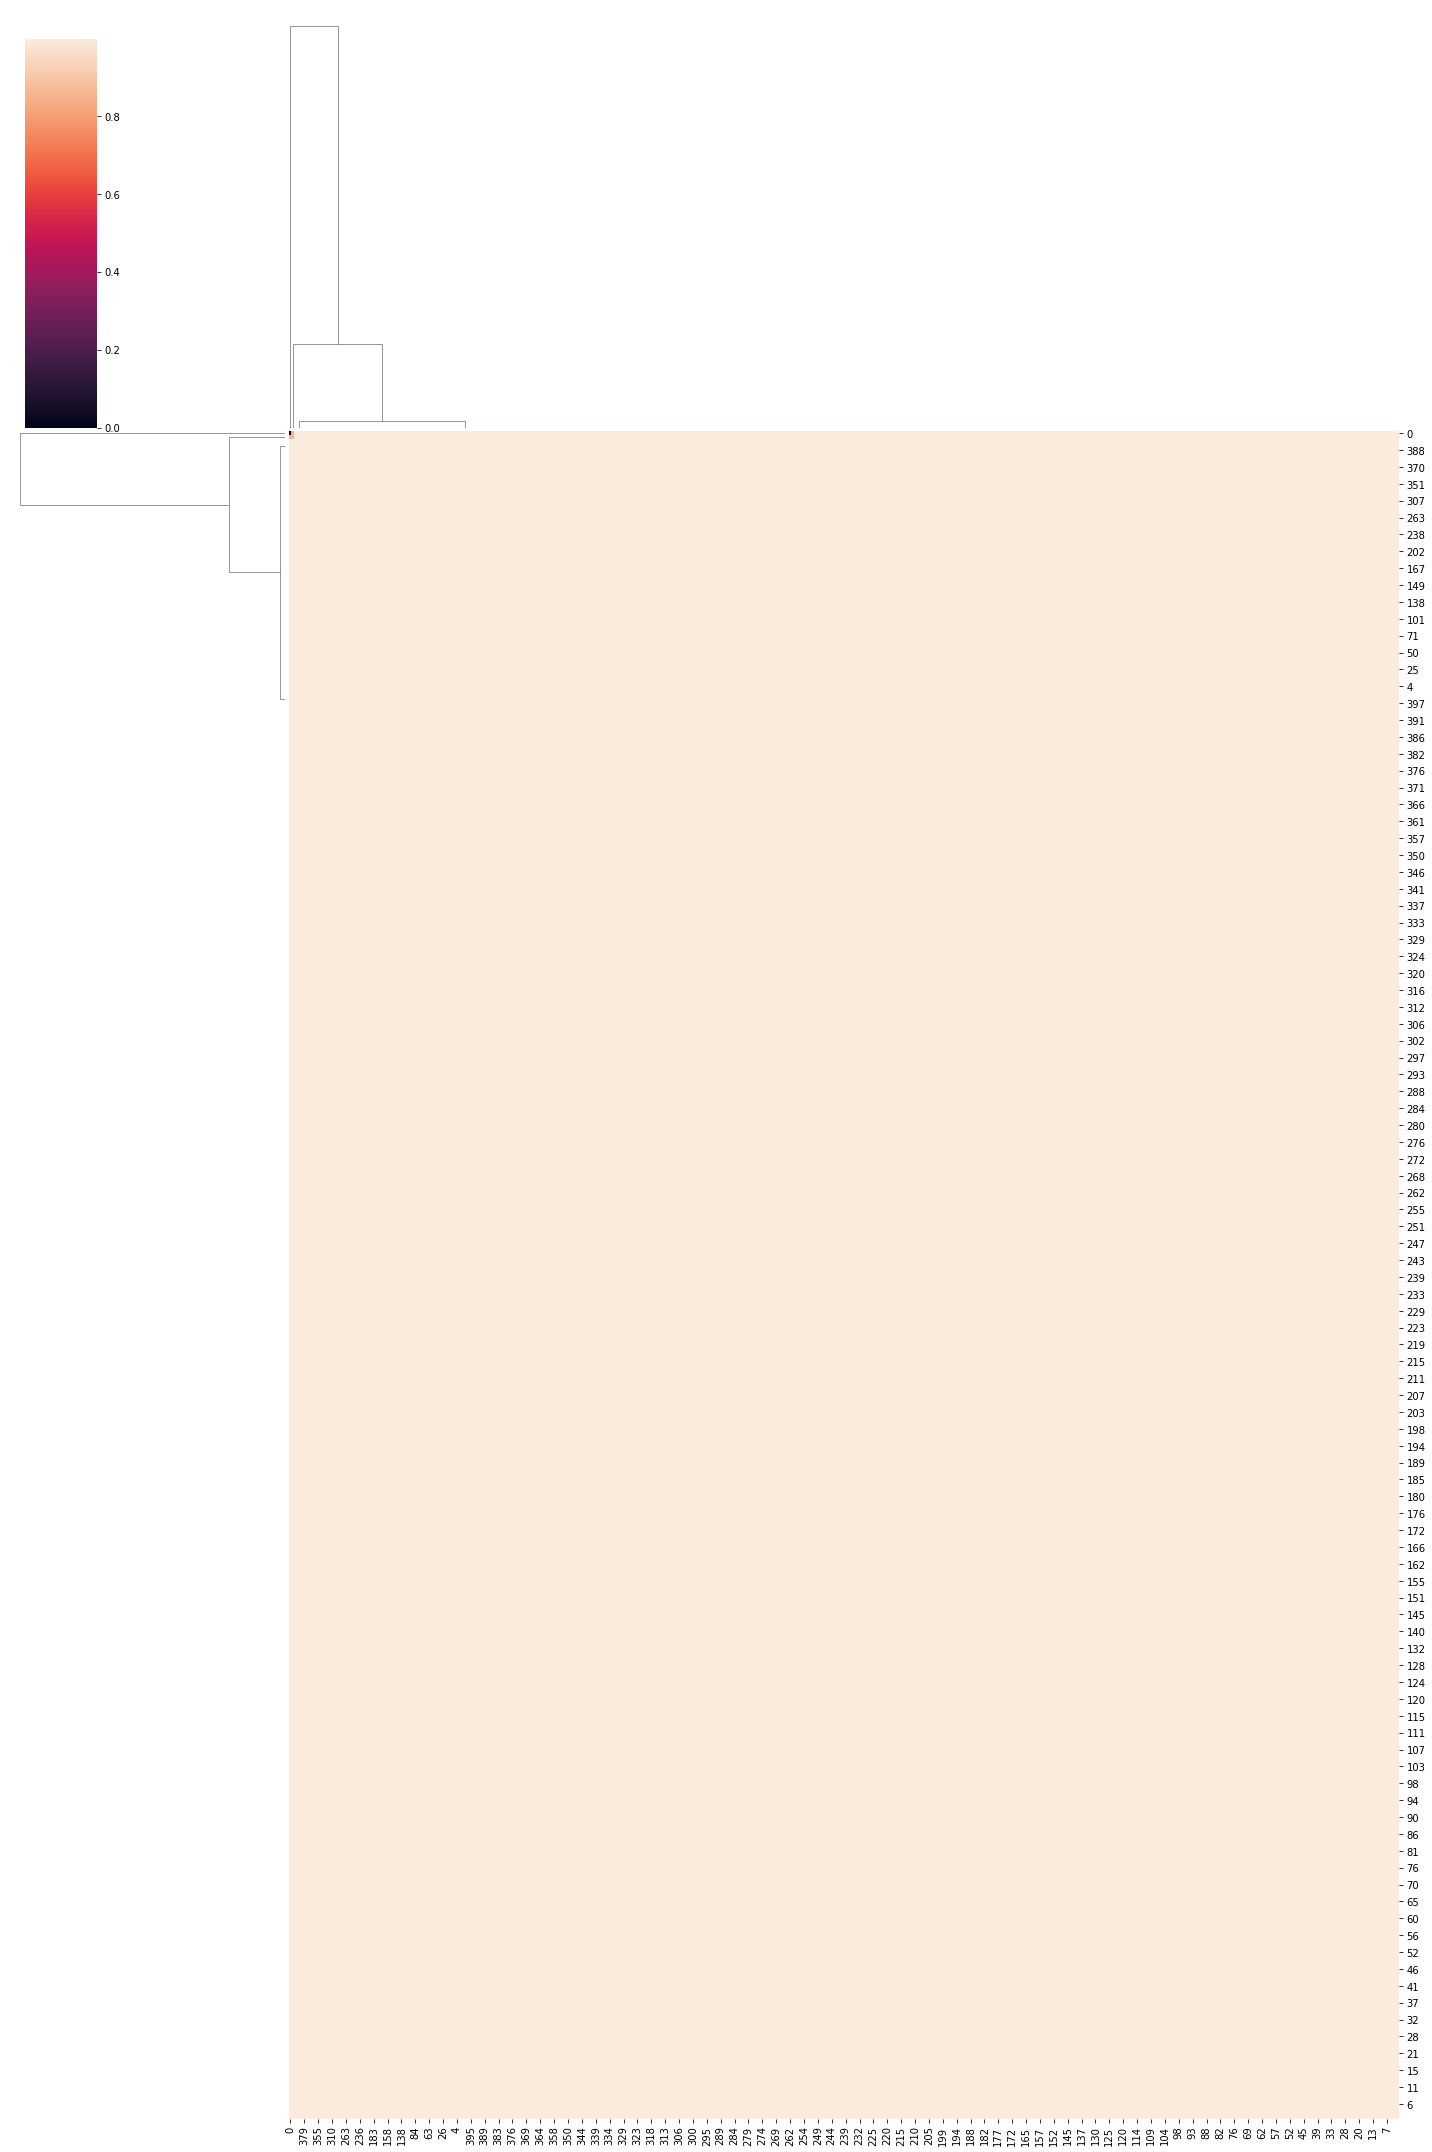

In [122]:
#russellrao
prussellrao = np.zeros((len(mat),len(mat)))
for i in range(len(mat)):
  for j in range(len(mat)):
    prussellrao[i][j]=distance.russellrao(mat.loc[[j]],mat.loc[[i]])          
  distrussellrao=pd.DataFrame(prussellrao)
print(distrussellrao)
figrussellrao=sns.clustermap(distrussellrao,figsize=(20, 30))

          0         1         2         3         4         5         6    \
0    0.000000  0.917456  0.998748  0.998748  0.997494  0.998748  0.998748   
1    0.917456  0.000000  0.260870  0.260870  0.264642  0.260870  0.260870   
2    0.998748  0.260870  0.000000  0.000000  0.004988  0.000000  0.000000   
3    0.998748  0.260870  0.000000  0.000000  0.004988  0.000000  0.000000   
4    0.997494  0.264642  0.004988  0.004988  0.000000  0.004988  0.004988   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.998748  0.260870  0.000000  0.000000  0.004988  0.000000  0.000000   
396  0.997494  0.264642  0.004988  0.004988  0.000000  0.004988  0.004988   
397  0.998748  0.260870  0.000000  0.000000  0.004988  0.000000  0.000000   
398  0.998748  0.260870  0.000000  0.000000  0.004988  0.000000  0.000000   
399  0.998748  0.260870  0.000000  0.000000  0.004988  0.000000  0.000000   

          7         8         9    ...       390       391       392  \
0  

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


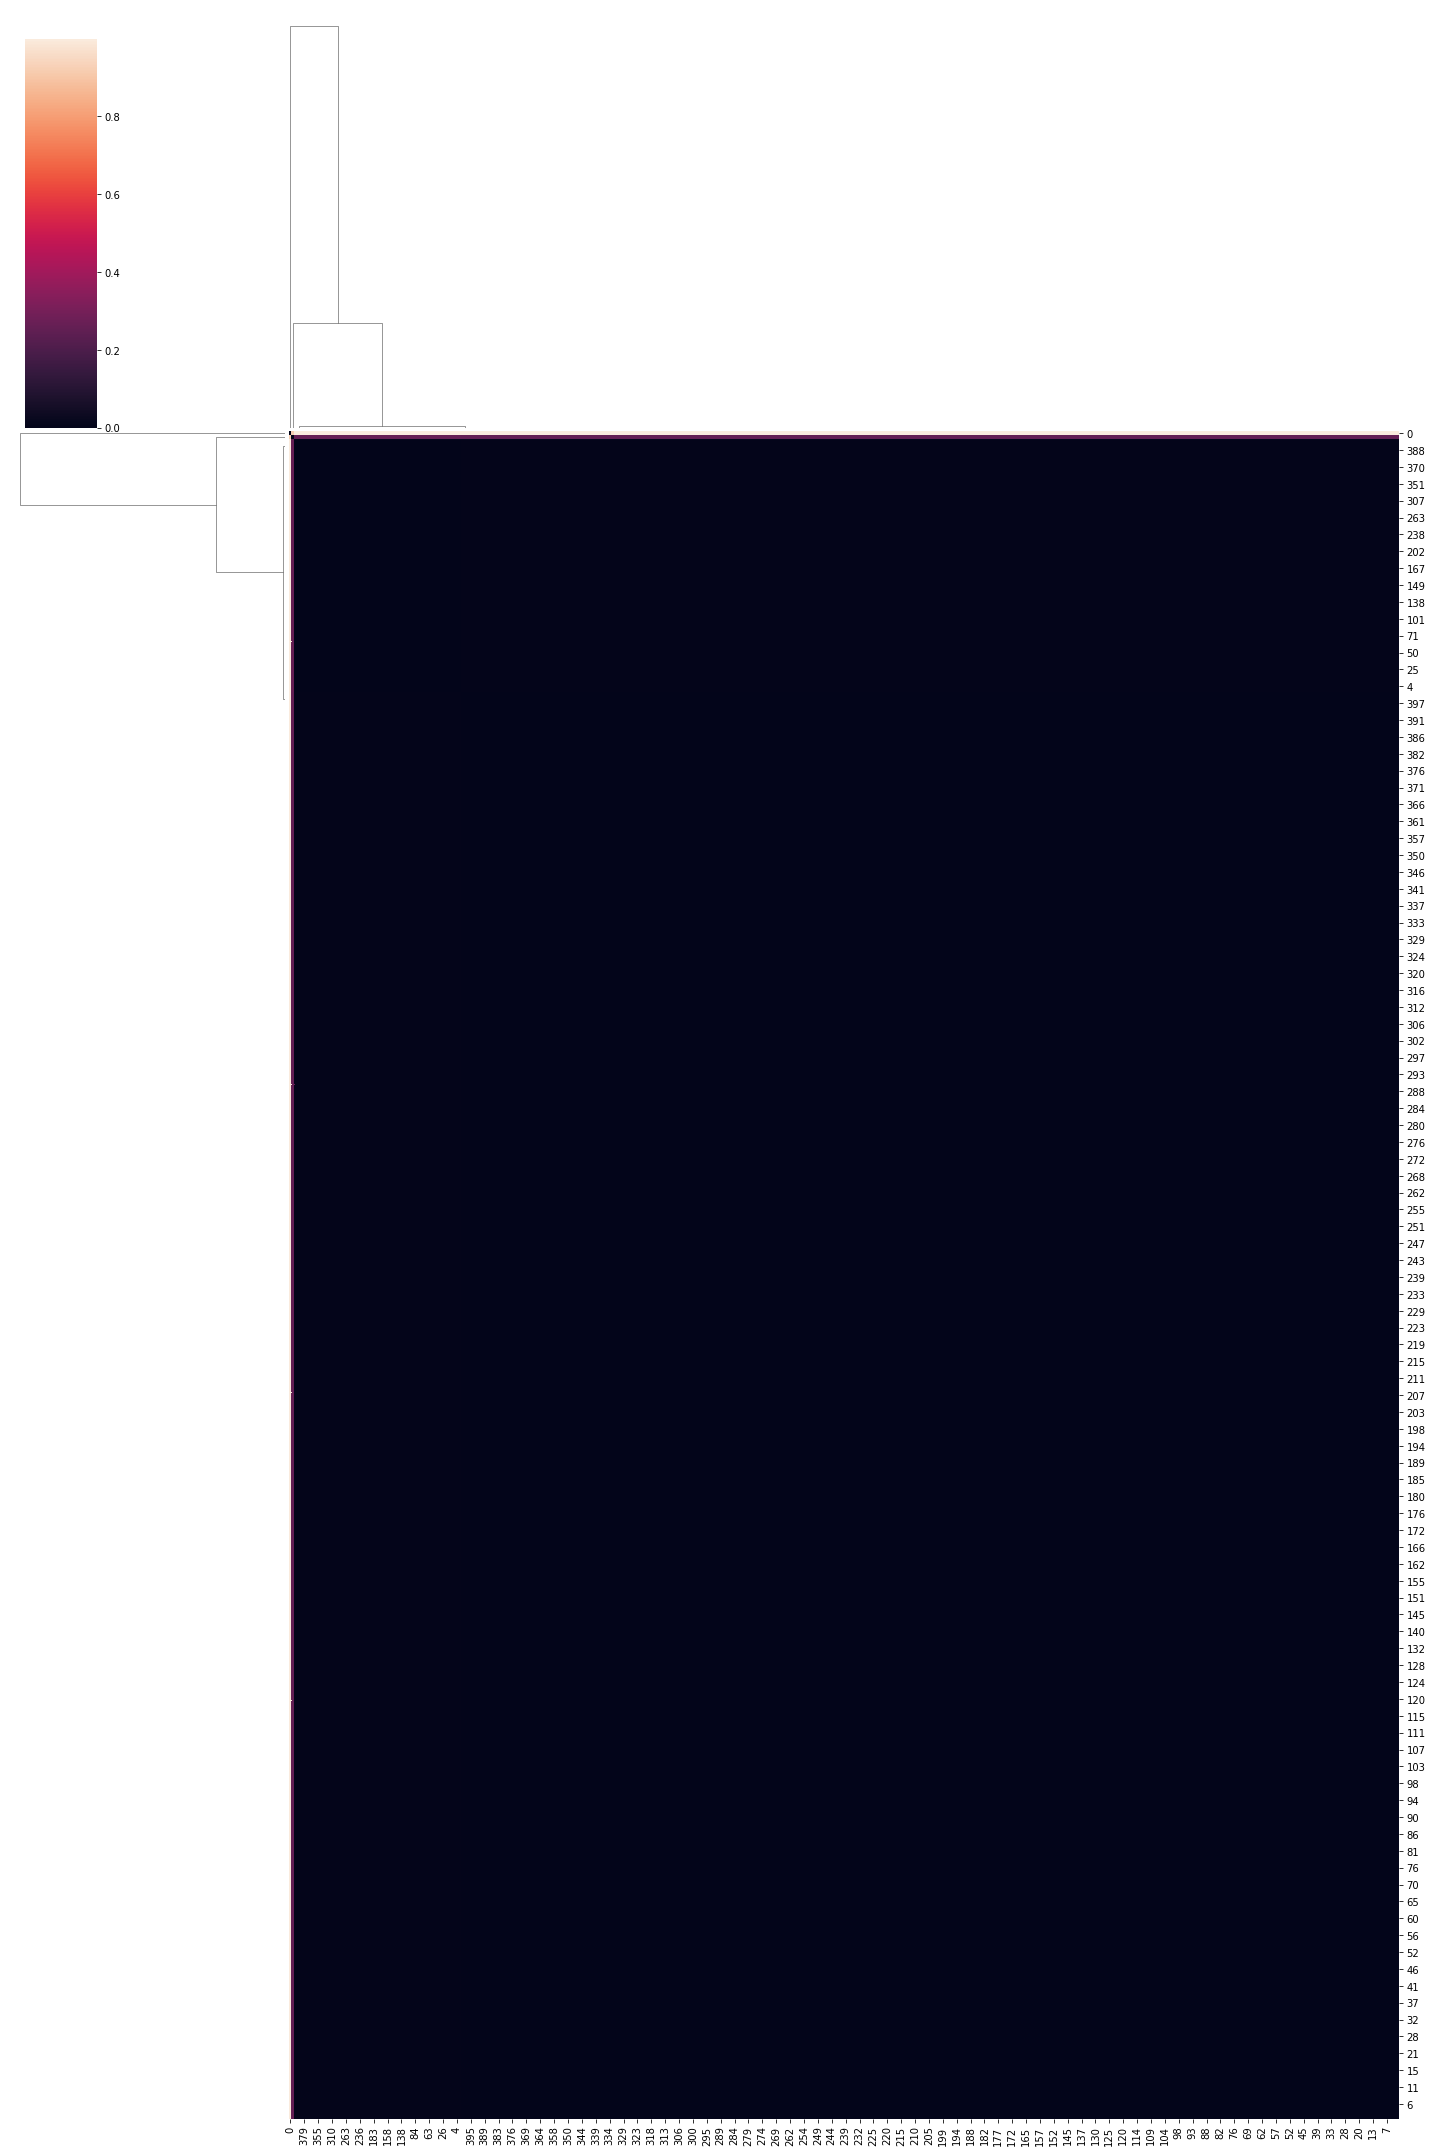

In [123]:
#sokalmichener
psokalmichener = np.zeros((len(mat),len(mat)))
for i in range(len(mat)):
  for j in range(len(mat)):
    psokalmichener[i][j]=distance.sokalmichener(mat.loc[[j]],mat.loc[[i]])          
  distsokalmichener=pd.DataFrame(psokalmichener)
print(distsokalmichener)
figsokalmichener=sns.clustermap(distsokalmichener,figsize=(20, 30))

          0         1         2         3         4         5         6    \
0    0.000000  0.917456  0.998748  0.998748  0.997494  0.998748  0.998748   
1    0.917456  0.847500  0.997826  0.997826  0.997831  0.997826  0.997826   
2    0.998748  0.997826  0.997500  0.997500  0.997506  0.997500  0.997500   
3    0.998748  0.997826  0.997500  0.997500  0.997506  0.997500  0.997500   
4    0.997494  0.997831  0.997506  0.997506  0.995000  0.997506  0.997506   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.998748  0.997826  0.997500  0.997500  0.997506  0.997500  0.997500   
396  0.997494  0.997831  0.997506  0.997506  0.995000  0.997506  0.997506   
397  0.998748  0.997826  0.997500  0.997500  0.997506  0.997500  0.997500   
398  0.998748  0.997826  0.997500  0.997500  0.997506  0.997500  0.997500   
399  0.998748  0.997826  0.997500  0.997500  0.997506  0.997500  0.997500   

          7         8         9    ...       390       391       392  \
0  

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


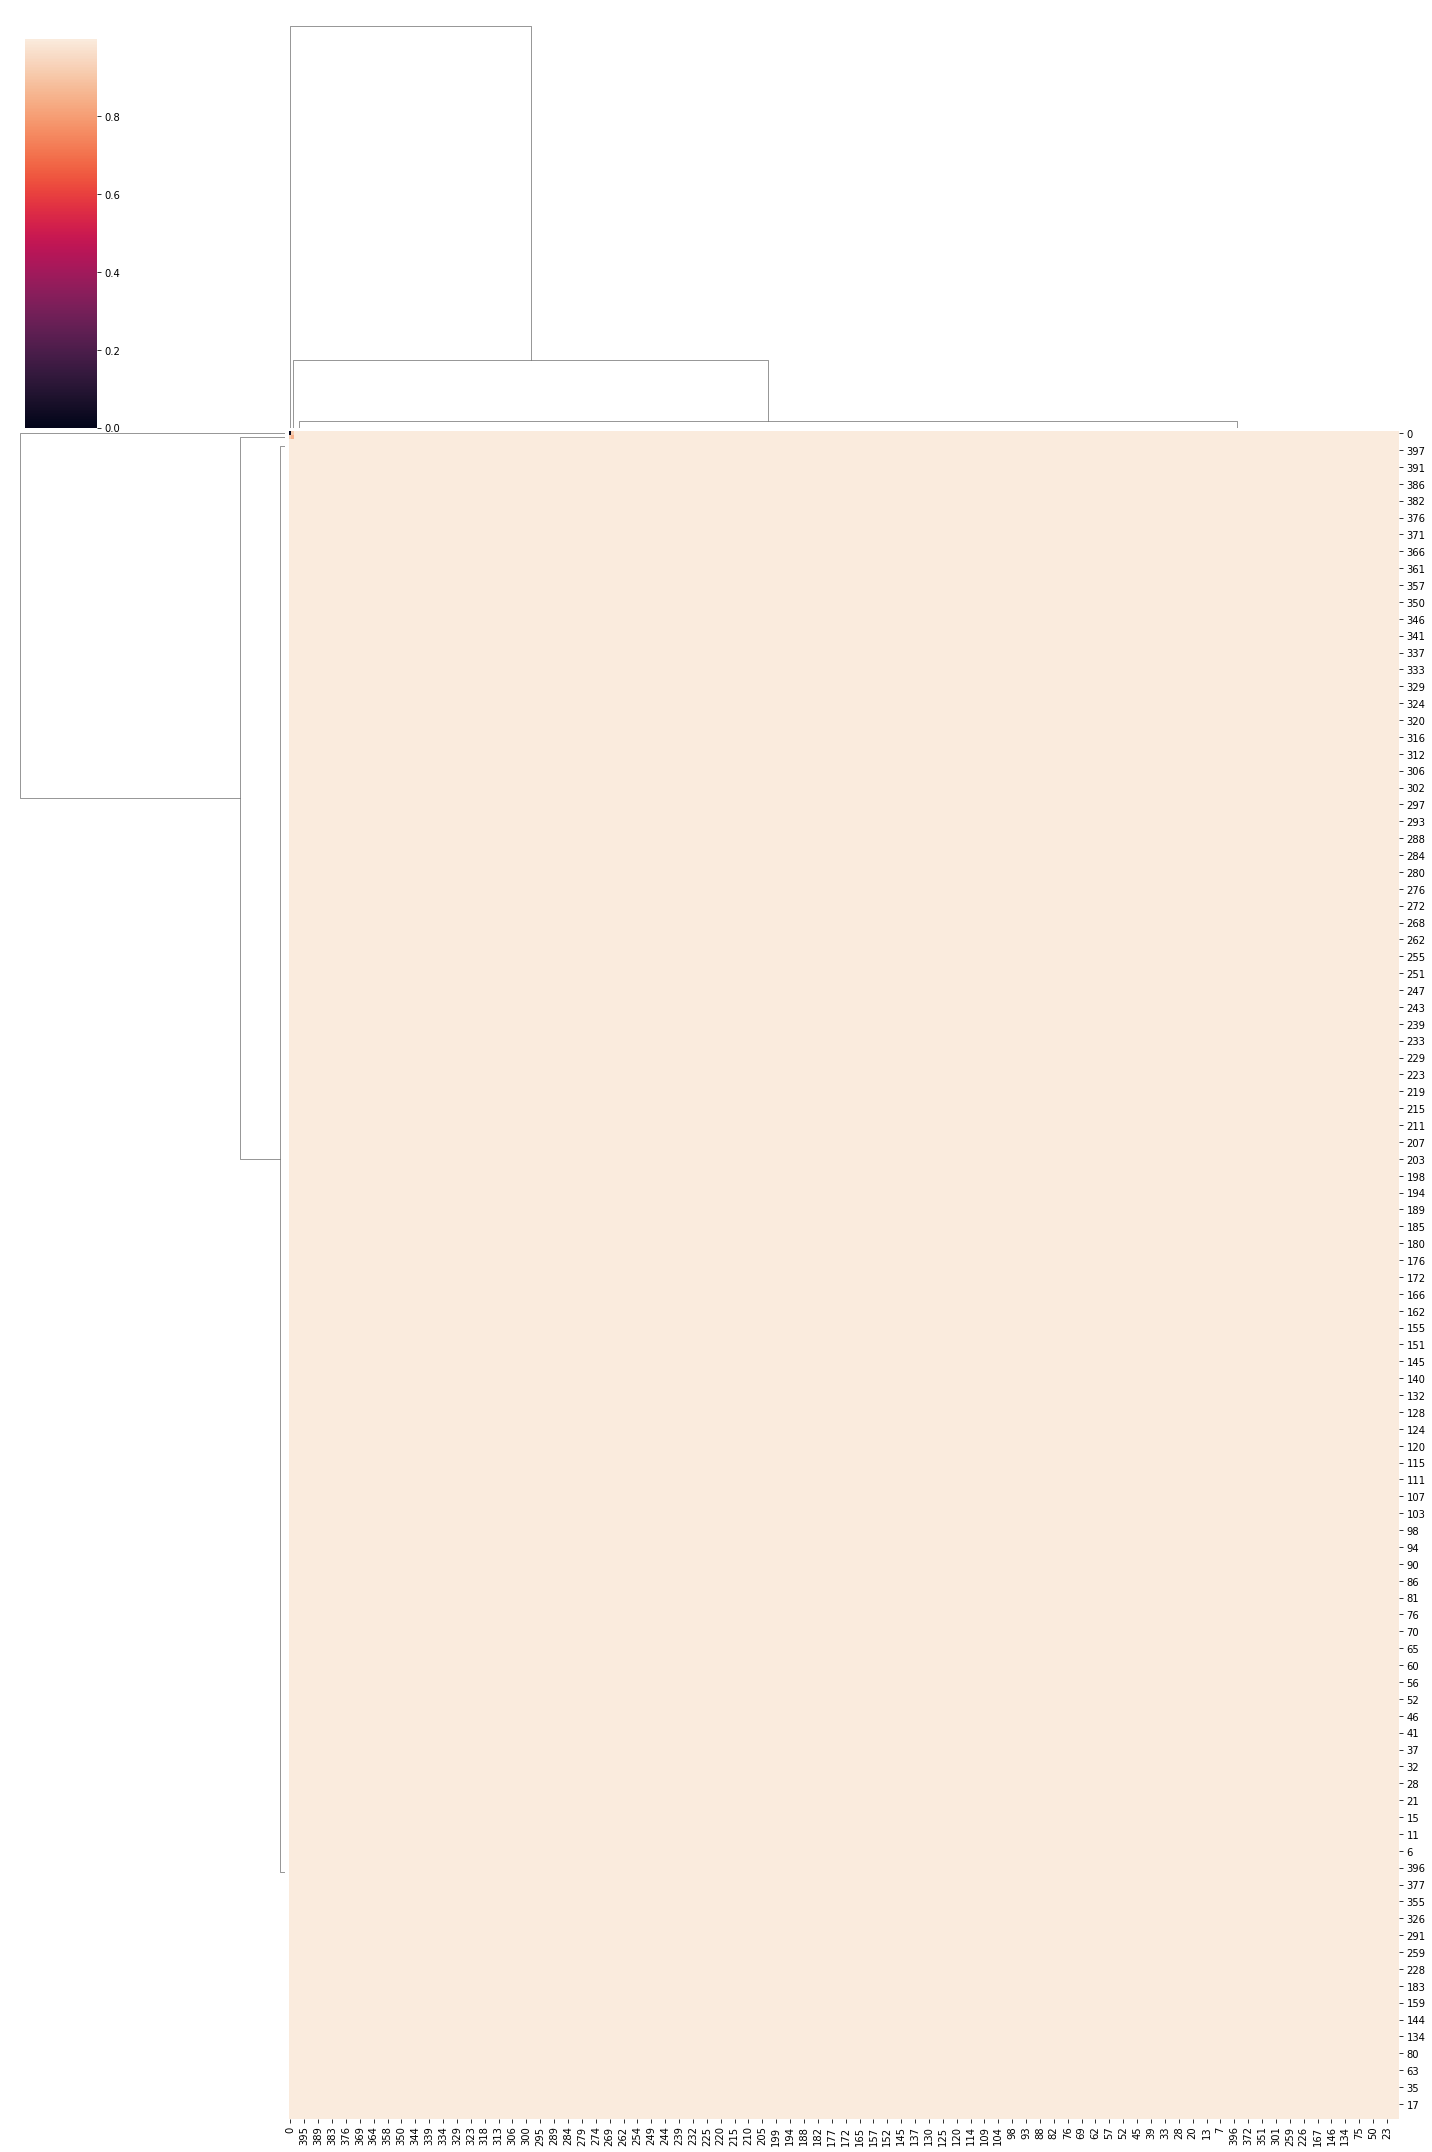

In [124]:
#kulsinski
pkulsinski = np.zeros((len(mat),len(mat)))
for i in range(len(mat)):
  for j in range(len(mat)):
    pkulsinski[i][j]=distance.kulsinski(mat.loc[[j]],mat.loc[[i]])          
  distkulsinski=pd.DataFrame(pkulsinski)
print(distkulsinski)
figkulsinski=sns.clustermap(distkulsinski,figsize=(20, 30))

     0         1    2    3         4    5    6    7         8    9    ...  \
0    0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  ...   
1    0.0  0.000000  0.0  0.0  0.301508  0.0  0.0  0.0  0.301508  0.0  ...   
2    0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  ...   
3    0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  ...   
4    0.0  0.301508  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  ...   
..   ...       ...  ...  ...       ...  ...  ...  ...       ...  ...  ...   
395  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  ...   
396  0.0  0.301508  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  ...   
397  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  ...   
398  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  ...   
399  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  ...   

     390  391  392  393       394  395       396  397  398  399  
0    0.0 

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


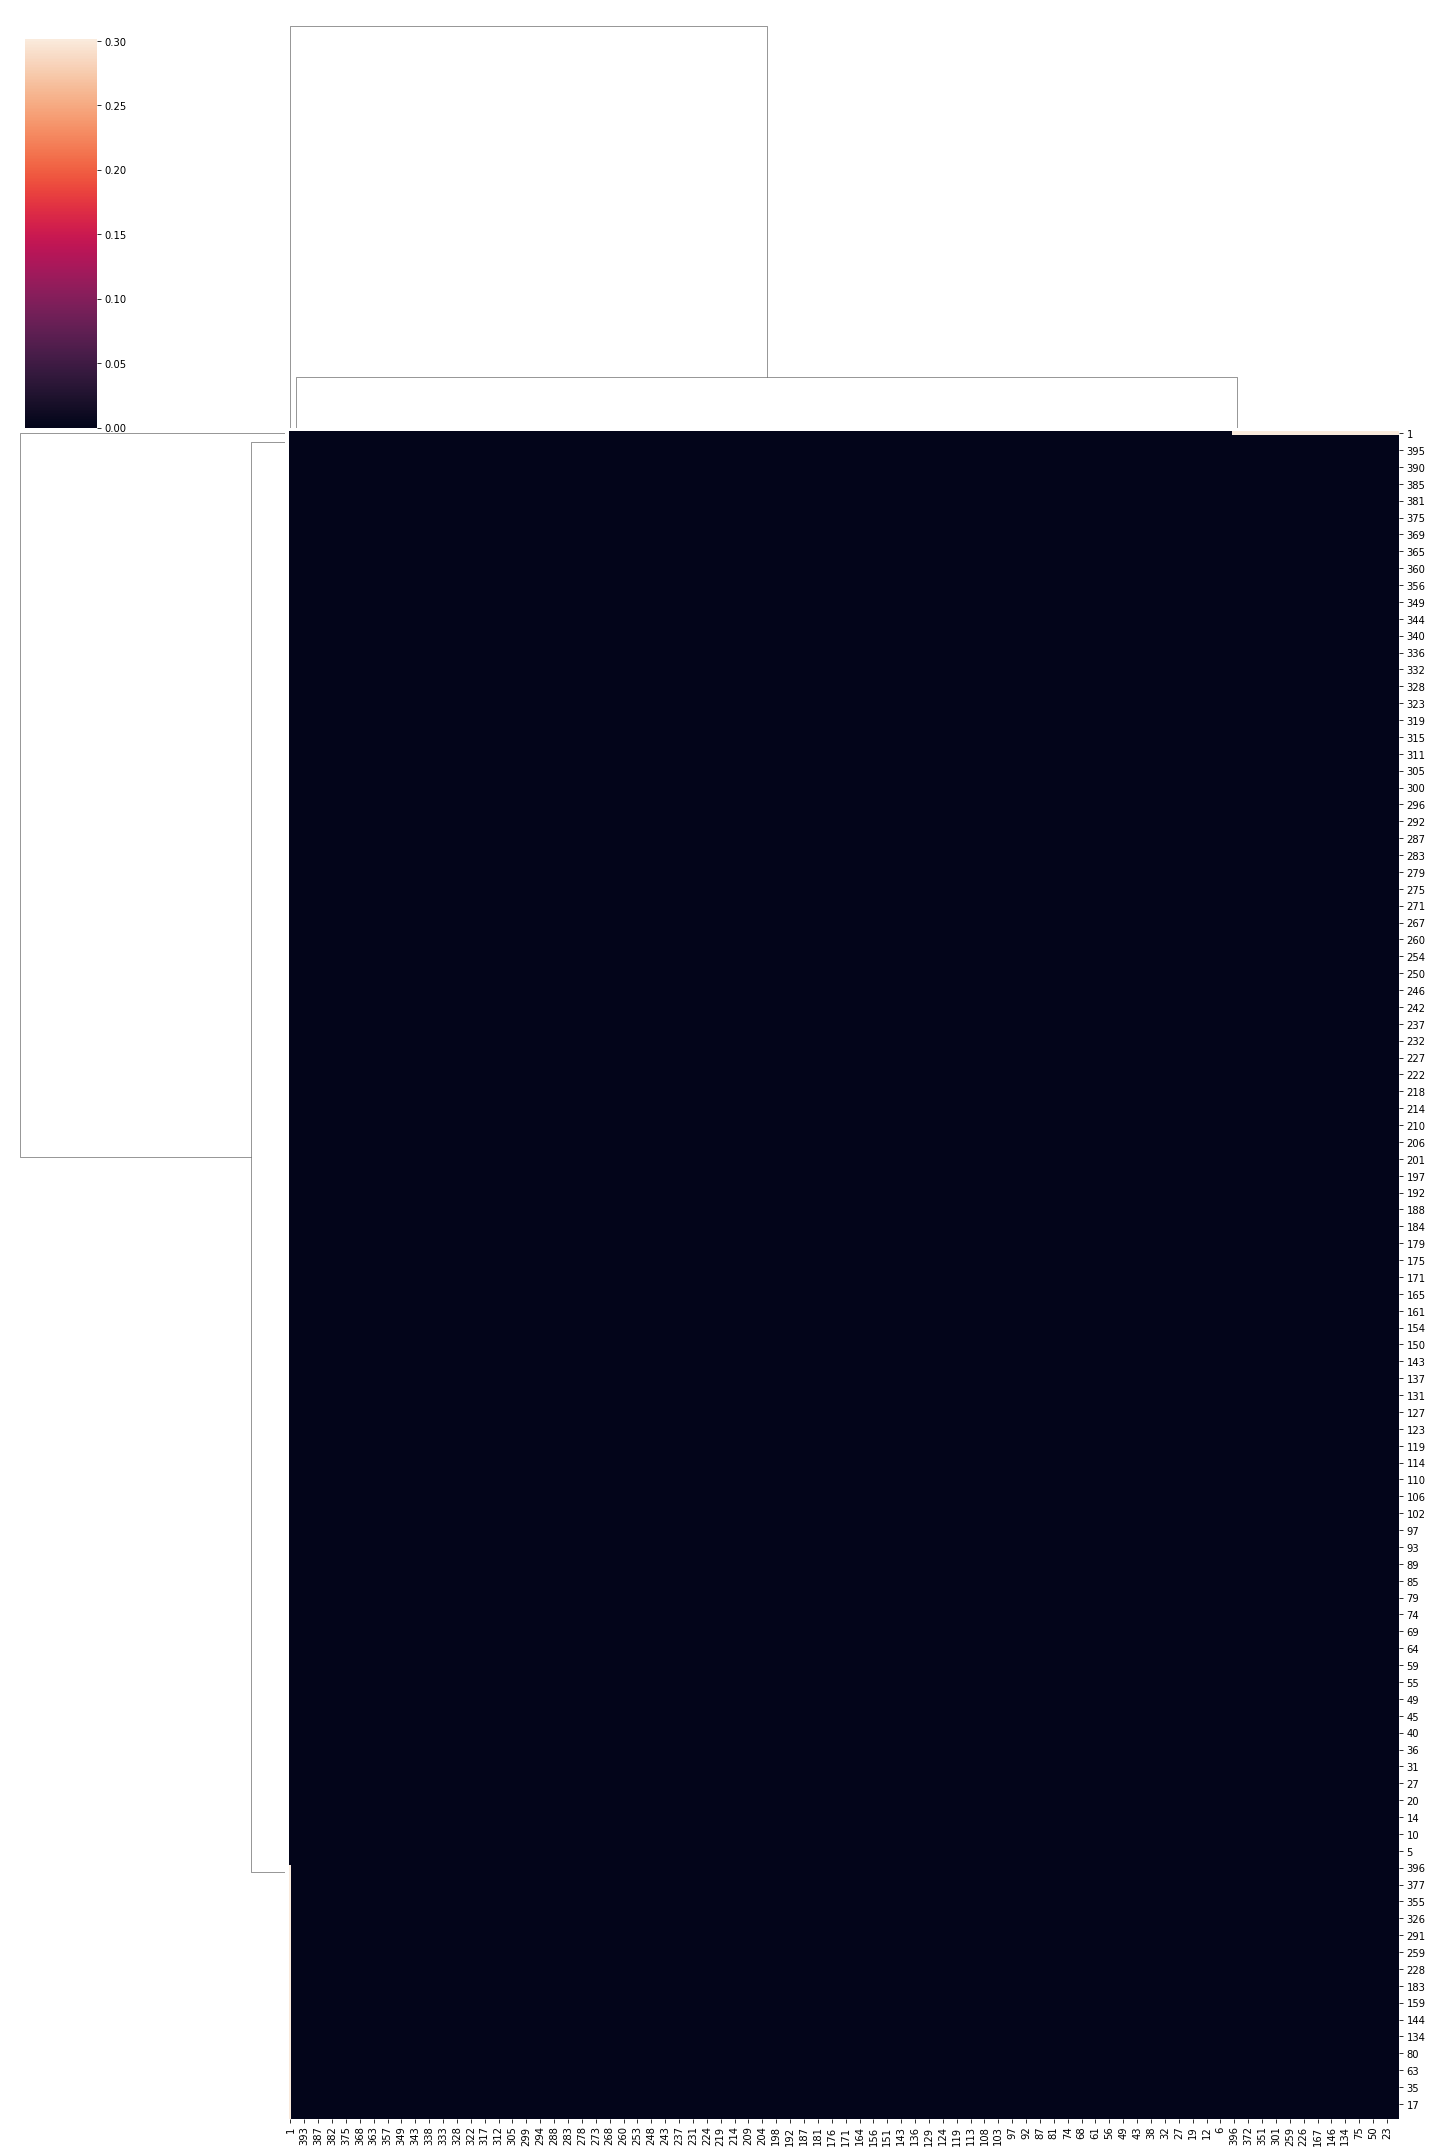

In [125]:
#yule
pyule = np.zeros((len(mat),len(mat)))
for i in range(len(mat)):
  for j in range(len(mat)):
    pyule[i][j]=distance.yule(mat.loc[[j]],mat.loc[[i]])          
  distyule=pd.DataFrame(pyule)
print(distyule)
figyule=sns.clustermap(distyule,figsize=(20, 30))

          0         1         2         3         4         5         6    \
0    0.000000  0.917456  0.998748  0.998748  0.997494  0.998748  0.998748   
1    0.917456  0.000000  0.260870  0.260870  0.264642  0.260870  0.260870   
2    0.998748  0.260870  0.000000  0.000000  0.004988  0.000000  0.000000   
3    0.998748  0.260870  0.000000  0.000000  0.004988  0.000000  0.000000   
4    0.997494  0.264642  0.004988  0.004988  0.000000  0.004988  0.004988   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.998748  0.260870  0.000000  0.000000  0.004988  0.000000  0.000000   
396  0.997494  0.264642  0.004988  0.004988  0.000000  0.004988  0.004988   
397  0.998748  0.260870  0.000000  0.000000  0.004988  0.000000  0.000000   
398  0.998748  0.260870  0.000000  0.000000  0.004988  0.000000  0.000000   
399  0.998748  0.260870  0.000000  0.000000  0.004988  0.000000  0.000000   

          7         8         9    ...       390       391       392  \
0  

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


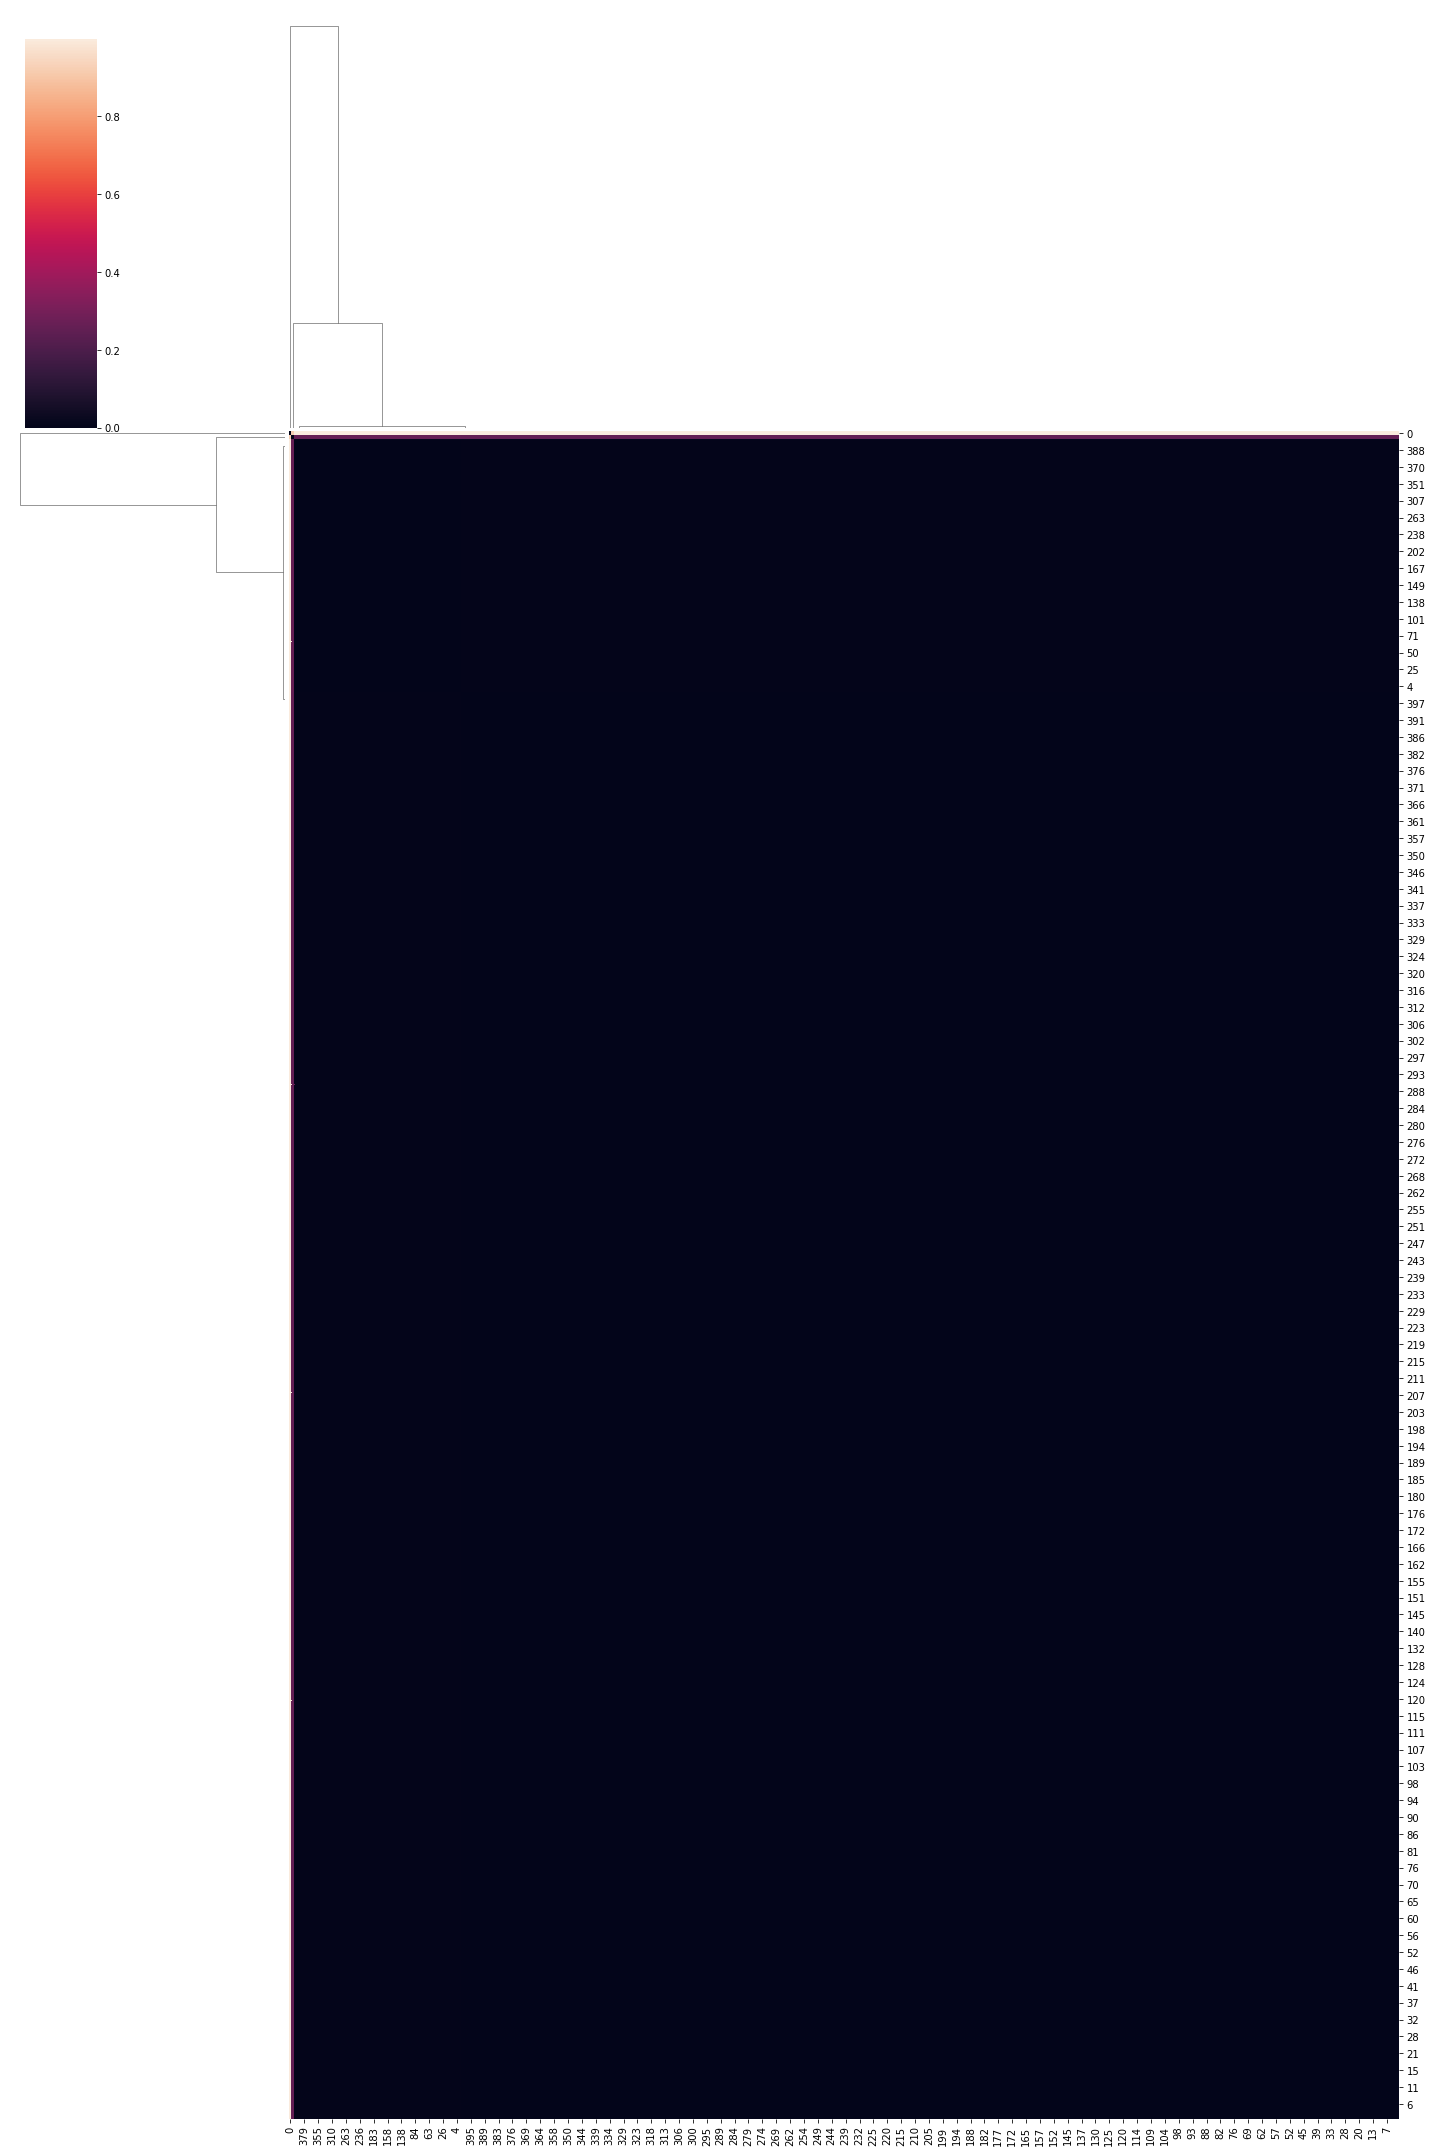

In [126]:
#rogerstanimoto
progerstanimoto = np.zeros((len(mat),len(mat)))
for i in range(len(mat)):
  for j in range(len(mat)):
    progerstanimoto[i][j]=distance.rogerstanimoto(mat.loc[[j]],mat.loc[[i]])          
  distrogerstanimoto=pd.DataFrame(progerstanimoto)
print(distrogerstanimoto)
figrogerstanimoto=sns.clustermap(distrogerstanimoto,figsize=(20, 30))

        0       1       2       3       4       5       6       7       8    \
0    0.0000  0.8475  0.9975  0.9975  0.9950  0.9975  0.9975  0.9975  0.9950   
1    0.8475  0.0000  0.1500  0.1500  0.1525  0.1500  0.1500  0.1500  0.1525   
2    0.9975  0.1500  0.0000  0.0000  0.0025  0.0000  0.0000  0.0000  0.0025   
3    0.9975  0.1500  0.0000  0.0000  0.0025  0.0000  0.0000  0.0000  0.0025   
4    0.9950  0.1525  0.0025  0.0025  0.0000  0.0025  0.0025  0.0025  0.0000   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
395  0.9975  0.1500  0.0000  0.0000  0.0025  0.0000  0.0000  0.0000  0.0025   
396  0.9950  0.1525  0.0025  0.0025  0.0000  0.0025  0.0025  0.0025  0.0000   
397  0.9975  0.1500  0.0000  0.0000  0.0025  0.0000  0.0000  0.0000  0.0025   
398  0.9975  0.1500  0.0000  0.0000  0.0025  0.0000  0.0000  0.0000  0.0025   
399  0.9975  0.1500  0.0000  0.0000  0.0025  0.0000  0.0000  0.0000  0.0025   

        9    ...     390     391     392     393   

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


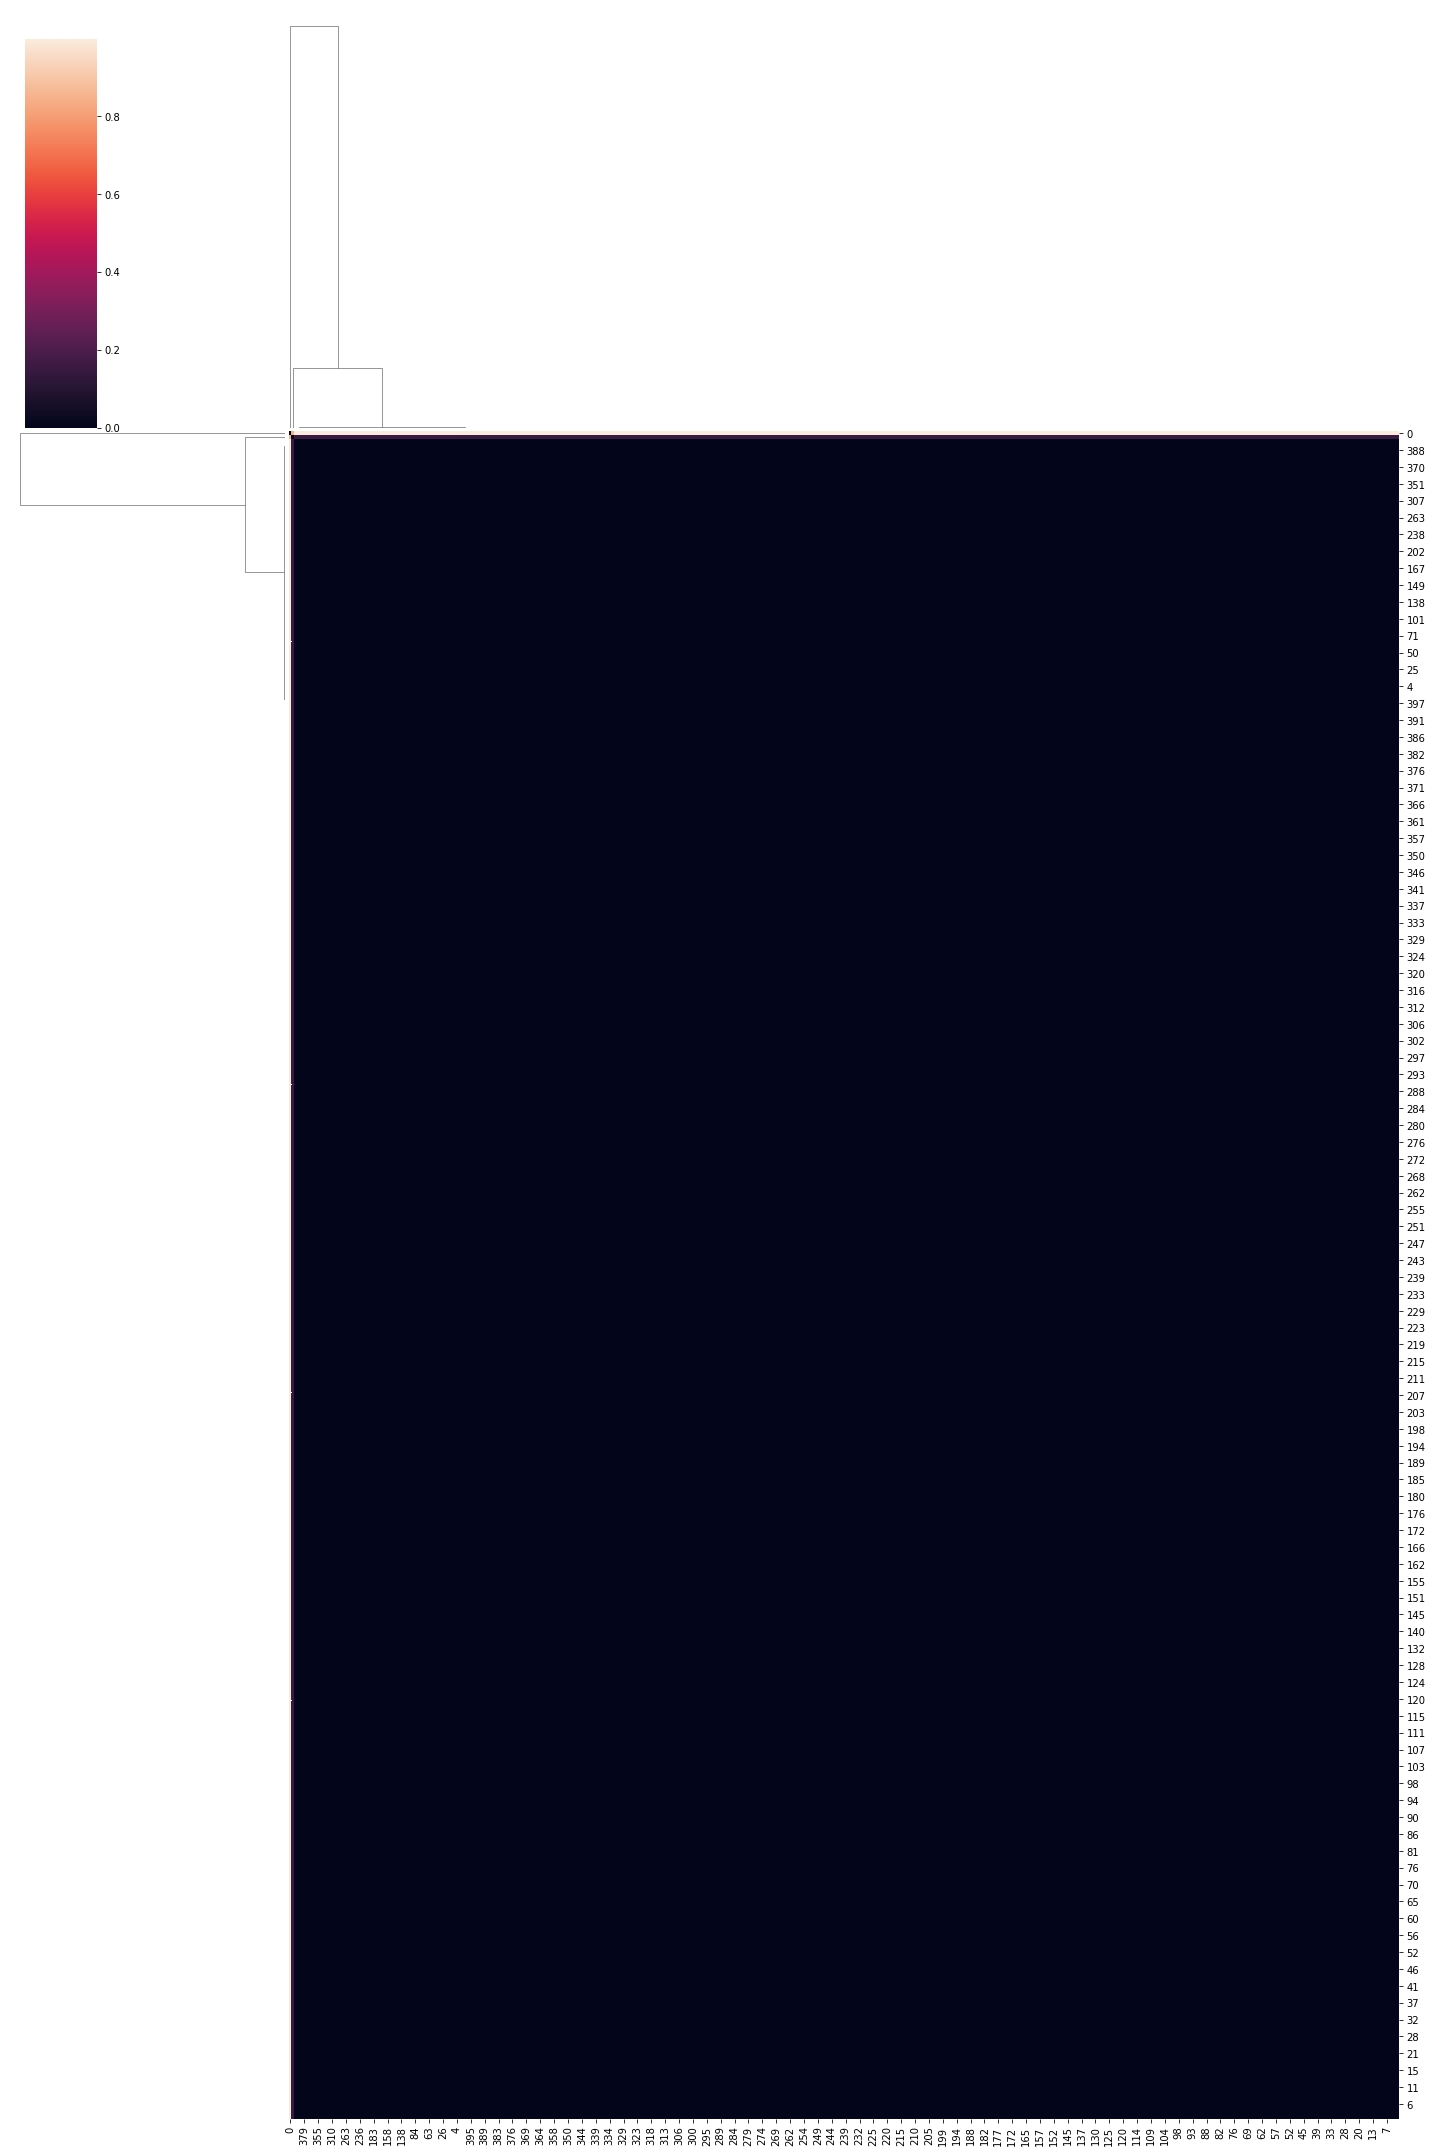

In [127]:
#hamming
phamming=np.zeros((len(mat),len(mat)))
for i in range(len(mat)):
  for j in range(len(mat)):
    phamming[i][j]=distance.hamming(mat.loc[[j]],mat.loc[[i]])
  distmathamming=pd.DataFrame(phamming)
print(distmathamming)
fig12=sns.clustermap(distmathamming,figsize=(20, 30))